In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import inflect
# %matplotlib inline
plt.style.use('ggplot')
p=inflect.engine()

In [240]:
df = pd.read_csv('data/pbp-2020.csv')
df.drop(['Unnamed: 10', 'Unnamed: 12', 'Unnamed: 16', 'Unnamed: 17', 'Challenger', 'IsMeasurement'], axis=1, inplace=True) # Removing empty columns

In [241]:
def is_success(row):
    if row['Down']==1 and row['Yards']/row['ToGo']>=.4:
        return 1
    elif row['Down']==2 and row['Yards']/row['ToGo']>=.60:
        return 1
    elif (row['Down']==3 or row['Down']==4) and row['Yards']>=row['ToGo']:
        return 1
    else:
        return 0

In [242]:
df.sort_values(['GameId', 'Quarter', 'Minute', 'Second'], ascending=[True, True, False, False], inplace=True) #Sorted by game and ordered by game time
df = df[df['PlayType'].notnull()]                                     # Removed null values associated with procedural warnings ie Two-Minute Warnings
df = df[df['PlayType']!='TIMEOUT']                                    # Removed timeouts
df = df[df['IsNoPlay']==0]                                            # Removed plays where the result of the play was called back
df['IsSuccess'] = df.apply(lambda row: is_success(row), axis=1)       # Added a column indicating whether or not the play was a success
rush_plays = df[df['IsRush']==1]                                      # Group Rush plays
pass_plays = df[df['IsPass']==1]                                      # Group Pass plays
teams = ['LV', 'MIN', 'TB', 'ARI', 'DEN', 'MIA', 'NYJ', 'CLE', 'NYG',
       'BAL', 'CIN', 'HOU', 'CHI', 'IND', 'PIT', 'DAL', 'WAS', 'SEA',
       'LA', 'CAR', 'TEN', 'BUF', 'KC', 'GB', 'ATL', 'NE', 'JAX', 'SF',
       'LAC', 'PHI', 'DET', 'NO']
Is_list = ['IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown', 'IsSack', 'IsChallenge', 'IsChallengeReversed', 'IsMeasurement', 'IsInterception',
    'IsFumble', 'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful', 'IsPenaltyAccepted', 'IsNoPlay']
formations = ['UNDER CENTER', 'SHOTGUN', 'NO HUDDLE SHOTGUN', 'NO HUDDLE']

In [246]:
def get_success_rates(team):
    '''Takes team input and returns success rate of rush/pass plays by formation for the given team. Returns a dictionary of
    dataframes with keys structured like "Down 1 Rushes" and "Down 3 Passes".'''
    rush_plays = df[df['IsRush']==1]
    pass_plays = df[df['IsPass']==1]
    success_rates = {}
    for i in range(1,5):
        temp_r = rush_plays[rush_plays['Down']==i]
        temp_p = pass_plays[pass_plays['Down']==i]
        success_rate_rush = temp_r.groupby('Formation')['IsSuccess'].mean()
        success_rate_pass = temp_p.groupby('Formation')['IsSuccess'].mean()
        success_rates[f'Down {i} Rushes'] = success_rate_rush
        success_rates[f'Down {i} Passes'] = success_rate_pass
    return success_rates


<BarContainer object of 2 artists>

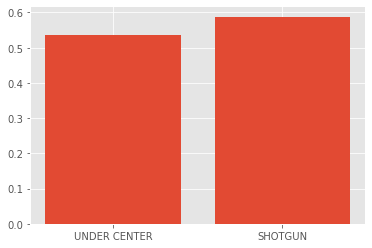

In [280]:
plt.bar(formations[:2], get_success_rates('LV')['Down 1 Passes'][:2])